In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
train = pd.read_csv("/content/train.csv")
test_images = (pd.read_csv("/content/test.csv").values).astype('float32')

In [3]:
train_images = (train.iloc[:, 1:].values).astype('float32')
train_labels = train['label'].values.astype('int32')

In [4]:
train_labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

In [5]:
train_images.shape

(42000, 784)

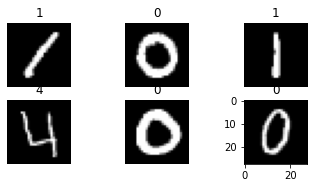

In [6]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)

for i in range(0,6):
    plt.axis("off")
    plt.subplot(330 + (i+1))
    plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))
    plt.title(train_labels[i])

In [9]:
train_images = train_images.reshape((42000, 28 * 28)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
#Normalize the Input Data
train_images = train_images/255
test_images = test_images/255

In [13]:
#One Hot Encoding - Target Variable
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
num_classes = train_labels.shape[1]
num_classes

10

In [27]:
#Build a sequential Model using Linear Stack - DNN

from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier


In [37]:
def create_model(learn_rate=0.01, momentum=0):
  model = Sequential()
  model.add(Dense(128, input_dim=784, activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(10,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

In [33]:
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model,verbose=0)
#define grid search parametes
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976262 using {'batch_size': 60, 'epochs': 100}
0.966952 (0.002360) with: {'batch_size': 10, 'epochs': 10}
0.972952 (0.000572) with: {'batch_size': 10, 'epochs': 50}
0.972262 (0.001448) with: {'batch_size': 10, 'epochs': 100}
0.970548 (0.002663) with: {'batch_size': 20, 'epochs': 10}
0.971429 (0.001263) with: {'batch_size': 20, 'epochs': 50}
0.973119 (0.001584) with: {'batch_size': 20, 'epochs': 100}
0.969381 (0.002687) with: {'batch_size': 40, 'epochs': 10}
0.974143 (0.001318) with: {'batch_size': 40, 'epochs': 50}
0.976048 (0.001362) with: {'batch_size': 40, 'epochs': 100}
0.969429 (0.001414) with: {'batch_size': 60, 'epochs': 10}
0.974643 (0.000456) with: {'batch_size': 60, 'epochs': 50}
0.976262 (0.001052) with: {'batch_size': 60, 'epochs': 100}
0.971048 (0.001720) with: {'batch_size': 80, 'epochs': 10}
0.974690 (0.000777) with: {'batch_size': 80, 'epochs': 50}
0.974786 (0.001488) with: {'batch_size': 80, 'epochs': 100}
0.969595 (0.000269) with: {'batch_size': 100, 'epochs':

In [39]:
#Tune Learning Rate And Momentum

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=60, verbose=0)
# define the grid search parameters
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images, train_labels)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.976690 using {'learn_rate': 0.3, 'momentum': 0.9}
0.974833 (0.000987) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.973976 (0.002274) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.975786 (0.001234) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.974310 (0.001167) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.975333 (0.000794) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.973881 (0.001634) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.975548 (0.001908) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.974476 (0.001448) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.975310 (0.000656) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.975548 (0.000566) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.975429 (0.001313) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.973524 (0.001070) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.975810 (0.000584) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.975286 (0.001090) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.975190 (0.000388) with: {'learn_rate': 0

In [60]:
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(128, input_dim=784, activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))
optimizer=Adam(learning_rate=0.003)
model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=100, batch_size=60, validation_split=0.2,shuffle=True,
         )

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 3s 76us/step - loss: 0.2749 - accuracy: 0.9170 - val_loss: 0.1431 - val_accuracy: 0.9549
Epoch 2/100
33600/33600 [==============================] - 2s 71us/step - loss: 0.1210 - accuracy: 0.9629 - val_loss: 0.1315 - val_accuracy: 0.9580
Epoch 3/100
33600/33600 [==============================] - 2s 71us/step - loss: 0.0845 - accuracy: 0.9731 - val_loss: 0.1085 - val_accuracy: 0.9670
Epoch 4/100
33600/33600 [==============================] - 2s 70us/step - loss: 0.0667 - accuracy: 0.9787 - val_loss: 0.1174 - val_accuracy: 0.9656
Epoch 5/100
33600/33600 [==============================] - 2s 70us/step - loss: 0.0548 - accuracy: 0.9818 - val_loss: 0.1160 - val_accuracy: 0.9700
Epoch 6/100
33600/33600 [==============================] - 2s 71us/step - loss: 0.0434 - accuracy: 0.9855 - val_loss: 0.1103 - val_accuracy: 0.9690
Epoch 7/100
33600/33600 [==============================] - 2s 7

In [61]:
predictions = model.predict_classes(test_images, verbose=0)
submissions=pd.DataFrame({'ImageId':list(range(1,len(predictions) + 1)), "Label": predictions})
submissions.to_csv("result_grid.csv", index=False, header=True)